In [174]:
#Command in order to install one of the required libraries needed to complete this coursework
pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Command in order to install one of the required libraries needed to complete this coursework
pip install pandas

In [113]:
#Command in order to install one of the required libraries needed to complete this coursework
#SEABORN IS USED IN ORDER TO VISUALIZE THE GRID SEARCH
pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 6.9 MB/s eta 0:00:0000:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you

In [176]:
#Commands in order to import the required libraries needed to complete this coursework
import matplotlib.pyplot as plt
import numpy as np
import pandas as ps
import math
import seaborn as sb

In [177]:
#Load the data into pandas dataframe
X_og = ps.read_csv("accent-mfcc-data-1.data", header=None)

#Create a copy of the data which will be worked on in order to retain the original dataset
X_pd = X_og.copy()

#Replace the target labels with numerical values where the index of the target_labels
#array denotes the numerical value for each target

target_labels = ["ES", "FR", "GE", "IT", "UK", "US"]

for i in range(len(X_pd)):
    if (X_pd.iloc[i,0] == "ES"):
        X_pd.iloc[i,0] = 0
    elif(X_pd.iloc[i,0] == "FR"):
        X_pd.iloc[i,0] = 1
    elif(X_pd.iloc[i,0] == "GE"):
        X_pd.iloc[i,0] = 2
    elif(X_pd.iloc[i,0] == "IT"):
        X_pd.iloc[i,0] = 3
    elif(X_pd.iloc[i,0] == "UK"):
        X_pd.iloc[i,0] = 4
    else:
        X_pd.iloc[i,0] = 5

#Retrieve targets' numerical values (first column of dataset) and add into a numpy array y

y_temp = X_pd.iloc[:,0]
y = y_temp.to_numpy()

#Retrieve data without the targets and add into a numpy array X

without_labels = X_pd.drop(X_pd.columns[0], axis=1)
X = without_labels.to_numpy()




In [178]:
#Function to compute the PCA decomposition of the dataset using 
#Singular Value Decomposition (SVD)

#The number parameter denotes the number of top PCs that will be returned
#which is done by taking the top rows from the V matrix

def components(dataset, number):
    U,D,V = np.linalg.svd(dataset, full_matrices=False)
    return V[:number, :]

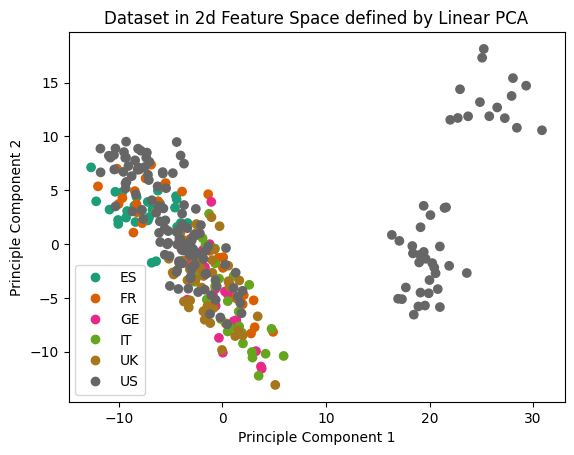

In [179]:
#Center the data

centered_X = X - X.mean(axis=0)

#Compute the new basis Z of the data using PCA to find the 
#top 2 principle components and multiplying that with the centered data
#The PCs are also transposed during the calculation of Z
#This produces a representation of the data in 2 dimensions

W = components(centered_X, 2)
Z = np.matmul(centered_X, W.T)

zrows, zcols = Z.shape

#Plot the datapoints in the new basis according to their class where a distinct
#colour is assigned to each class
#This will produce a scatter plot of the data in 2 dimensions

scatter = plt.scatter(Z[:,0], Z[:,1], c=y, cmap='Dark2')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Dataset in 2d Feature Space defined by Linear PCA")
plt.legend(handles=scatter.legend_elements()[0], labels=["ES", "FR", "GE", "IT", "UK", "US"])
plt.show()

#Discussion 1 (Section II.A):
#The scatter plot below shows the whole dataset in the 2d feature space defined by linear PCA. After visual inspection,
#the dataset is not linearly separable in 2d. This is because for the dataset to be linearly separable in 2d, a decision boundary
#should be able to be created which should divide the feature space into six half-spaces (one for each class in the dataset).
#Due to the clustering of the data points, the training examples cannot be separated by a linear decision rule (i.e each training
#example is not associated with a distinct half-space) which means that they are not linearly separable in 2d


In [180]:
#Multi-class Perceptron function which takes in the dataset as well as the array containing the numerical targets of the dataset

def perceptron(X, y):
    
    #This code below is used to initialise a weight array which will be refined during the iterations of the 
    #multi-class perceptron. A weight array which contains six arrays within it is created, where each array
    #is associated with one of the six classes of the dataset. For each of these arrays, the number of values
    #within them is dependent on the number of features in the current representation of the dataset which is
    #passed into the multi-class perceptron. For example if the original dataset is passed in, there would be
    #12 features and therefore each array would contain 12 values all initialised to 0. There is also 
    #an additional value added to each array which will be set to 1 in order to add a bias.

    rows, cols = (6, X.shape[1]+1)
    w = [[0 for i in range(cols)] for j in range(rows)]
    for element in w:
        element[X.shape[1]] = 1

    #A bias term is added to the dataset by adding a column of 1's

    biasCol = np.ones((X.shape[0],1), dtype=int)
    newX = np.hstack((X, biasCol))

    #This multi-class perceptron refines weights for 10 iterations
    for i in range(10):
        #In order to pick all available examples in random order, an array with indices for all training examples
        #is created and shuffled. This array is then looped through and the index is used to reference that 
        #training example which would mean all training examples would be accounted for whilst being referenced
        #in a random order
        fVIndices = np.arange(329)
        np.random.shuffle(fVIndices)
        for fVI in fVIndices:
            fV = newX[fVI]

            #A dictionary is created for every training example that is looped through, which will hold
            #the value of the current feature vector multiplied with the weight matrices for each class.
            #This will help find the maximum multiplication value which will denote 
            dict = {}

            #Multiply the current feature vector with the weight matrices for each class
            #and store it in the dictionary where the key is the class number and the 
            #value is the multiplication value

            for k in range (len(w)):
                val = np.matmul(w[k],fV)
                dict[k] = val
            
            #Retrieve the class (key) from the dictionary which has the maximum value as this would
            #denote the class which the current feature vector has been assigned to, based on the 
            #current state of the weights

            y_current = max(dict, key=dict.get)

            #Also retrieve the actual class/target which is associated with the feature vector
            y_target = y[fVI]

            #In the event that a misclassification has occurred, adjust the weights such that the 
            #current feature vector is subtracted from the weights of the incorrect class, and the
            #feature vector is added to the weights of the correct class. By doing so, we make 
            #the multiplication value of the feature vector with the weight of the correct class
            #larger and the value of the incorrect class smaller which would mean in the next
            #iteration, it's more likely that the correct class will be associated with the feature
            #vector due to the refined weights

            if (y_current != y_target):
                w[y_current] = w[y_current] - fV
                w[y_target] = w[y_target] + fV
    
    #Once the 10 iterations of refining the weights have been completed, another separate iteration
    #is run in order to compute the accuracy on the entire dataset with the current state of the weights
    #This behaves in the same manner as the 10 iterations above, however instead of refining the weights
    #when there is a misclassification, it will add 1 to the error count. This is then returned which
    #denotes the number of misclassifications that occurred with the current state of the weights

    errSum = 0
    fVIndices = np.arange(329)
    np.random.shuffle(fVIndices)
    for fVI2 in fVIndices:
        dict = {}
        fV2 = newX[fVI2]
            
        for k in range (len(w)):
            val = np.matmul(w[k],fV2)
            dict[k] = val
                
        y_current = max(dict, key=dict.get)
        y_target = y[fVI2]

        if (y_current != y_target):
            errSum+=1

    return errSum

In [182]:
#The dataset in the original feature space is used within the multi-class perceptron in order to check
#if the dataset is linearly separable. This is because the multi-class perceptron algorithm can find a 
#perfect classifier in a finite number of steps as long as the data is linearly separable. 

#Discussion 2 (Section II.B):
#With 10 iterations of the multi-class perceptron being run, the accuracy is generally 60-70% (for multiple attempts at running
#the perceptron). This suggests that the dataset is not linearly separable in the original feature space as the accuracy
#would instead be 100% if it was indeed linearly separable in 10 iterations, due to having no misclassifications. 
#However, this does not necessarily mean that the dataset is definitely not linearly separable in the original feature 
#space as it could be the case that by running the multi-class perceptron for more iterations, the dataset could be
#linearly separable in the original feature space

errorOG = perceptron(centered_X,y)
accuracyOG = round(((329-errorOG)/329)*100, 2)
print("Original Feature Space Accuracy: " + str(accuracyOG) + "%")



Original Feature Space Accuracy: 62.61%


In [196]:
#The dataset in all possible feature spaces defined by linear PCA is used within the multi-class perceptron 
#in order to check if the dataset is linearly separable. This is done by retrieving a number of top PCs from SVD
#(from maximum dimensionality to 2d feature vectors) to calculate the dataset in the new basis which is then used
#within the multi-class perceptron

#Discussion 3 (Section II.B):
#With 10 iterations of the multi-class perceptron being run, the accuracy generally rises from 40% to 70% 
#for the 2d feature space all the way to the 12d feature space. This suggests that the dataset is not linearly separable 
#in any of the possible feature spaces defined by linear PCA as the accuracy would instead be 100% if it was indeed 
#linearly separable in 10 iterations, due to having no misclassifications. 
#However, this does not necessarily mean that the dataset is definitely not linearly separable in any of the possible 
#feature spaces defined by linear PCA as it could be the case that by running the multi-class perceptron for 
#more iterations, the dataset could be linearly separable

for i in range(2, 13):
    W = components(centered_X,i)
    Z = np.matmul(centered_X, W.T)

    errors = perceptron(Z,y)
    accuracy = round(((329-errors)/329)*100, 2)
    print(str(i)+"d Feature Space Accuracy:" + str(accuracy) + "%")

2d Feature Space Accuracy:47.11%
3d Feature Space Accuracy:50.76%
4d Feature Space Accuracy:42.25%
5d Feature Space Accuracy:54.41%
6d Feature Space Accuracy:53.8%
7d Feature Space Accuracy:52.58%
8d Feature Space Accuracy:49.54%
9d Feature Space Accuracy:60.49%
10d Feature Space Accuracy:69.3%
11d Feature Space Accuracy:69.3%
12d Feature Space Accuracy:69.6%


In [197]:
row, cols = centered_X.shape
vals = []

#In order to compute the range of values to select the best value of gamma, the variances of all columns
#in the centered original dataset is retrieved and the maximum and minimum variances are used within
#the formula given in the coursework guide to find the minimum and maximum gamma values

for i in range(cols):
    var = np.var(centered_X[:, i])
    vals.append(var)
                
maxVar = max(vals)
minVar = min(vals)

epsilon = 0.05

gammaMin = 1/(2*(maxVar+epsilon))
gammaMax = 1/(2*(minVar+epsilon))

gammas = []

#From the minimum value of gamma, increments of 0.010 are performed in order to find the full range
#of gamma values to be used in the grid search, by adding values of gamma into the gammas array
#as long as the values are less than the maximum value of gamma 

gammaCurrent = gammaMin
while (gammaCurrent <= gammaMax):
    gammas.append(gammaCurrent)
    gammaCurrent+=0.010
gammas.append(gammaMax)
    

In [208]:
#In order to perform the grid search to find the values of gamma and the lowest dimensionality of the 
#new feature vectors that make the dataset linearly separable in the very high dimensional feature space,
#an error matrix is first created of size 330 by 7 as there will be 329 different top PC values to try
#along with 7 different gamma values to try. This error matrix will hold the number of errors found 
#after 10 iterations of the multi-class perceptron using that number of top PCs and that value of gamma

errorMatrix = np.full((330,8), 0)
A = np.full((row,row), 1/row)
#Loop through all possible values of gamma to fill in the error matrix
for g in range (len(gammas)):
    K = np.zeros((row, row))
    for i in range(row):
        for j in range(row):
            #Use the Radial Basis Function Kernel to create the K matrix for this value of gamma
            dist = np.linalg.norm(centered_X[i,:]-centered_X[j,:])
            distsqrd = pow(dist,2)
            val = math.exp(-(gammas[g]*distsqrd))
            K[i][j] = val

    #Normalize K
    norK = K - (np.matmul(A,K)) - (np.matmul(K,A)) + np.matmul(np.matmul(A,K),A)

    #For the current value of gamma, try different number of top PCs from 13 to 329 in order to 
    #create the feature space defined by non linear PCA with all possible feature vectors (i.e from
    #maximum dimensionality to 13d feature vectors). The dataset in the new basis (with the current
    #value of gamma and the current number of top PCs) is entered into the multi-class perceptron
    #for 10 iterations to calculate the number of errors retrieved and this is then stored in the 
    #error matrix
    for p in range(13, 330):
        V = components(norK, p)
        Z = np.matmul(norK, V.T)
        error = perceptron(Z,y)
        errorMatrix[p][g] = error
        



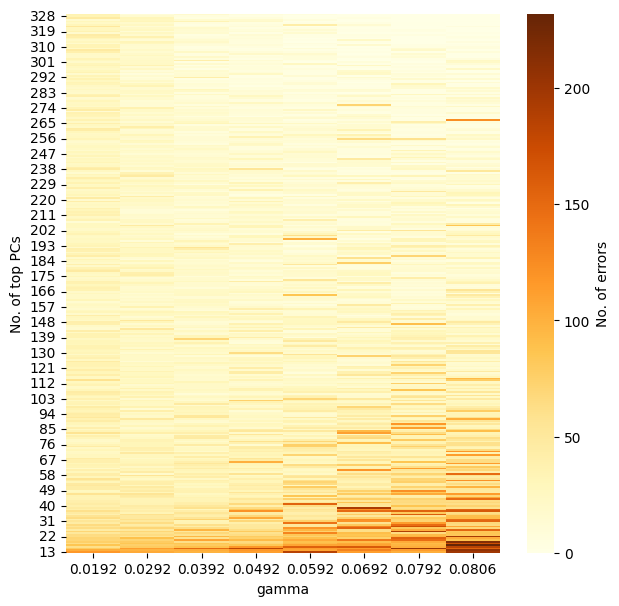

In [214]:
#Plotting the results of the grid search with different colours denoting the performance of
#the multi-class perceptron. The colour of each cell indicates the number of errors made by the multi-class
#perceptron on the whole dataset after refining the weights for a number of iterations, where dark red 
#indicates the maximum number of errors and light yellow indicates the minimum number of errors

#The plotting is done by first converting the error matrix into a pandas dataframe which is then
#plotted through the use of a seaborn heatmap

PCs = np.arange(330)
df = ps.DataFrame(columns=PCs, index=gammas)
for i in range(errorMatrix.shape[0]):
    for j in range(errorMatrix.shape[1]):
        df.iloc[j,i] = errorMatrix[i][j]
df.drop(columns=df.columns[:13],axis=1, inplace=True)

for i in (df.columns):
    df[i] = df[i].astype(float)

gammasNew = [0.0192,0.0292,0.0392,0.0492,0.0592,0.0692,0.0792, 0.0806]

plt.figure(figsize=(7,7))
ax = sb.heatmap(df.transpose(), xticklabels=gammasNew, cmap='YlOrBr', cbar_kws={'label': 'No. of errors'})
ax.invert_yaxis()
plt.xlabel("gamma")
plt.ylabel("No. of top PCs")
plt.show()

#This heatmap shows that as the number of top PCs used as well as the gamma value increases, the
#number of errors decreases


In [213]:
#In order to find the minimum number of PCs needed to make the dataset linearly separable in the feature
#space defined by non-linear PCA, the error matrix is looped through and is checked to see if any row
#contains 0. If this is the case, then that number of top PCs with a certain value of gamma results in 0 
#errors after 10 iterations of the multi-class perceptron. In order to find the value of gamma which
#results in 0 errors for that number of top PCs, the index of where that 0 is found in that row is checked

for i in range(13,errorMatrix.shape[0]):
    if (0 in errorMatrix[i,:]):
        print("Minimum Number of PCs that allows linearly separating the data : " + str(i))
        for j in range(len(errorMatrix[i,:])):
            if (errorMatrix[i,j] == 0):
                print("Value of gamma that allows linearly separating the data : " + str(gammas[j]))
                break
        break

#Discussion 4 (Section II.B):
#The dataset is shown to be linearly separable in the feature space defined by non-linear PCA. This is because for
#multiple values of top number of PCs used as well as various gamma values, the multi-class perceptron returns 0 errors
#i.e the refined weights after 10 iterations give 100% accuracy. This is shown in the heatmap above where near the 
#top, there seems to be a very light yellow colour which indicates 0 errors. Upon running the grid search multiple
#times for testing purposes, the minimum number of PCs that allowed the data to be linearly separable existed within
#the range of 270-290 PCs where the value of gamma to go with it was generally 0.0692, 0.0792 or the max gamma value
#0.0806

#A reason why the minimum number of PCs that allows linearly separating the data isn't a strict
#value and can change between separate runs could be due to randomly selecting the training examples
#picked in every iteration of the multi-class perceptron and therefore the different order could 
#mean different results

#In this current run of the grid search, the minimum number of PCs that allows linearly separating the data
#is 283, and the value of gamma that allows linearly separating the data is 0.06920499723800104

Minimum Number of PCs that allows linearly separating the data : 283
Value of gamma that allows linearly separating the data : 0.06920499723800104
